# Comparing E to grad(phi)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("case1-input-phi.txt", sep="\s+")
data.columns = ["radius", "number_density", "azimuthal_velocity", "temperature", "radial_electric_field", "potential"]
data.head()

,radius,number_density,azimuthal_velocity,temperature,radial_electric_field,potential
0,0.000000,0.213281,0.000000e+00,0.000001,0.000000,7.574395e-07
1,0.000005,0.213299,-4.499460e-10,0.000001,0.000002,7.574341e-07
2,0.000010,0.213353,-3.598273e-09,0.000001,0.000004,7.574189e-07
3,0.000015,0.213444,-1.213689e-08,0.000001,0.000006,7.573938e-07
4,0.000020,0.213571,-2.874479e-08,0.000001,0.000008,7.573589e-07


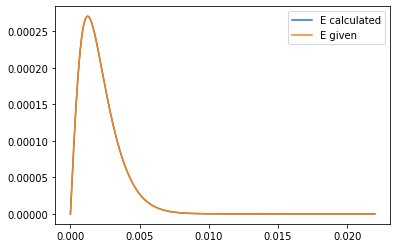

In [12]:
E_calc = -(data.potential.diff() / data.radius.diff()).fillna(0)
plt.plot(data.radius, E_calc)
plt.plot(data.radius, data.radial_electric_field)
plt.legend(["E calculated", "E given"])
plt.show()

max absolute difference   =  8.947731999865026e-07 
	at 1
max percent difference    =  1.0 
	at 2956
mean absolute difference  =  5.538451820870271e-08


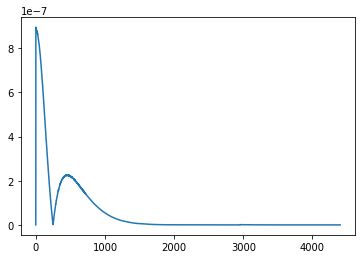

0       0.000000e+00
1       8.947732e-07
2       8.834061e-07
3       8.857627e-07
4       8.837069e-07
            ...     
4396    5.280780e-11
4397    5.307420e-11
4398    5.334160e-11
4399    5.361040e-11
4400    5.388040e-11
Length: 4401, dtype: float64

In [23]:
abs_diff = np.abs(E_calc - data.radial_electric_field)
print(f"max absolute difference   =  {np.max(abs_diff)} \n\tat {np.argmax(abs_diff)}")
print(f"max percent difference    =  {np.max(abs_diff / E_calc)} \n\tat {np.argmax(abs_diff / E_calc)}")
print(f"mean absolute difference  =  {np.mean(abs_diff)}")
plt.plot(abs_diff)
plt.show()
abs_diff